Введение в statsmodels. Непараметрический анализ временных
рядов.


Знакомство с библиотекой статистического анализа временных рядов statsmodels.tsa.


Разложение временных рядов.

 Методы непараметрического предсказания временных
рядов. Методы скользящего среднего.
Импорт данных.
Statsmodels
фреймворка
python
-
один
из
самых
популярных
инструментов
исследователей для решения многих задач статистического анализа. Одним из наиболее
интересных модулей этой библиотеки является statsmodels.tsa, описание которого вы
можете найти здесь: https://www.statsmodels.org/stable/tsa.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
# Use seaborn style defaults and set the default figure size
sns.set(rc={'font.size': 15})
%matplotlib inline
import statsmodels.api as sm



In [2]:
sns.set(rc={'figure.figsize':(16, 4)})

В этой работе мы будем работать со следующим набором данных

In [3]:
df=sm.datasets.get_rdataset("AirPassengers", "datasets")
df

<class 'statsmodels.datasets.utils.Dataset'>

In [4]:
df=df.data["value"]
df

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: value, Length: 144, dtype: int64

In [5]:
df.shape[0]

144

In [6]:
df.index=pd.date_range(start = "1949-01", periods =
df.shape[0], freq = "M").to_period()
df.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', length=144)

In [7]:
df.index = df.index.to_timestamp()
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

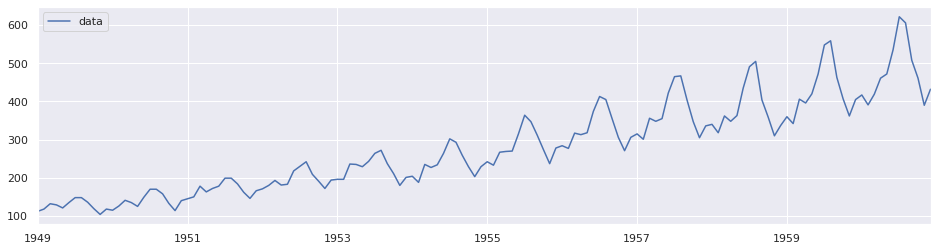

In [8]:
airpass = sm.datasets.get_rdataset("AirPassengers", "datasets")
airpass = pd.DataFrame(airpass.data["value"])
airpass.index = pd.date_range(start = "1949-01", periods =
len(airpass.index), freq = "M").to_period()
airpass.index = airpass.index.to_timestamp()
airpass=airpass.rename(columns={"value": "data"}, inplace = False)
airpass.plot();

In [9]:
airpass

,data
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


Введение в StatsModels
Для визуализации временных рядов с помощью StatsModels воспользуемся модулем
sm.graphics. Для начала проанализируем функцию автокорреляции (АКФ, ACF). АКФ - это
степень зависимости текущих значений временного ряда по отношению к его
отстающей версии самого себя

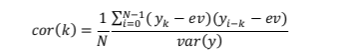

Ниже взяты первые 20 лагов (начиная от 1-го ( k= 1))

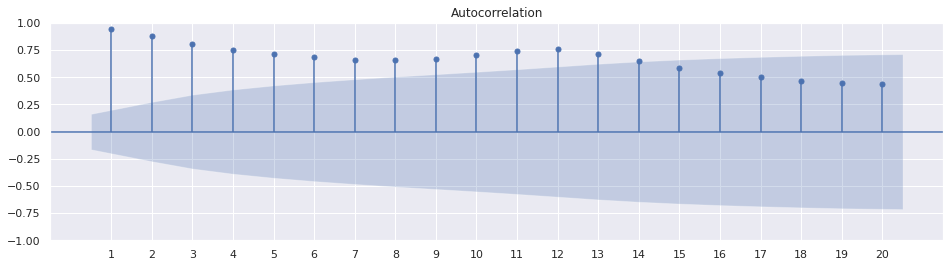

In [10]:
#Plot the ACF:
lags = 20
sm.graphics.tsa.plot_acf(airpass,
lags = lags,
zero = False)
plt.xticks(np.arange(1, lags + 1, 1.0));
plt.show()

Помимо полной корреляции временного ряда пакет StatsModels позволяет оценить его
частичную корреляционную функцию (PACF). «Частичная» корреляция между двумя
переменными - это степень корреляции между ними, которая не объясняется их
взаимной корреляцией с заданным набором других переменных. Например, если мы
регрессируем переменную Y по другим переменным X1, X2 и X3, частичная корреляция
между Y и X3 - это степень корреляции между Y и X3, которая не объясняется их общими
корреляциями с X1 и X2. Здесь X1 X2 и X3 могут быть отстающими версиями Y.

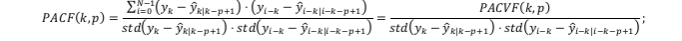

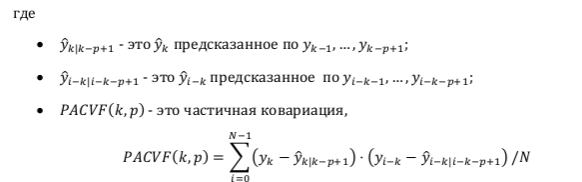

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


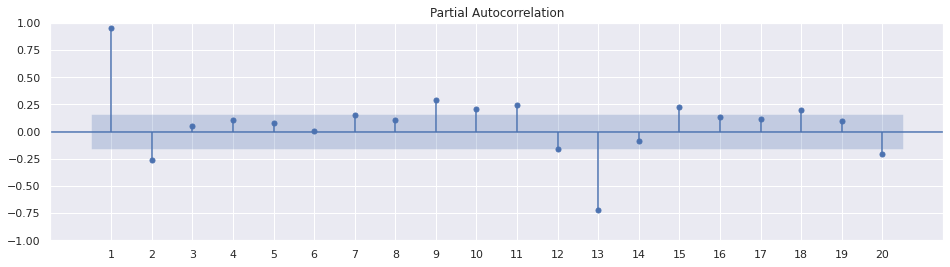

In [11]:
lags = 20
sm.graphics.tsa.plot_pacf(airpass,
lags = lags,
zero = False)
plt.xticks(np.arange(1, lags + 1, 1.0))
plt.show()

Для графической проверки распределения в наборе данных также можно
построить график Q – Q (квантиль-квантиль) и график гистограммы.

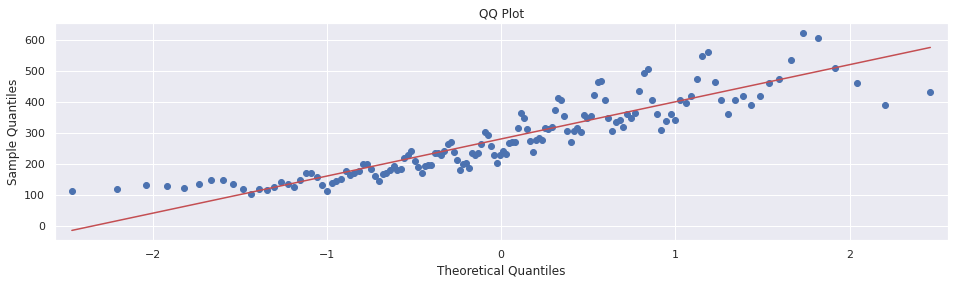

In [12]:
#Plot the QQ plot of the data:
sm.qqplot(airpass,
line='s')
plt.title("QQ Plot")
plt.show()

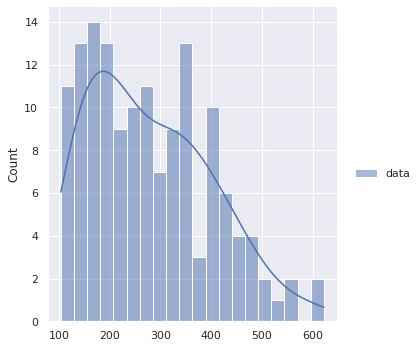

In [13]:
sns.displot(airpass,bins=20,kde=True);

Также проверим данные по тесту Люнга-Бокса (гипотеза нормального распределения).

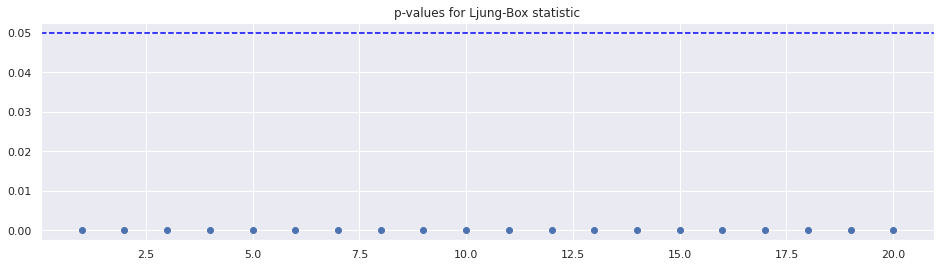

In [14]:
lags = 20
#The Ljung-Box test results for the first k lags:
tmp_acor = sm.stats.diagnostic.acorr_ljungbox(airpass, lags = lags,
boxpierce = True, return_df = False)
# get the p-values
p_vals = pd.Series(tmp_acor[1])
#Start the index from 1 instead of 0 (because Ljung-Box test is for
#lag values from 1 to k)
p_vals.index += 1
fig = plt.figure()
#Plot the p-values:
p_vals.plot(linestyle='',
            marker='o',
            title = "p-values for Ljung-Box statistic",
            legend = False)
#Add the horizontal 0.05 critical value line
plt.axhline(y = 0.05, color = 'blue', linestyle='--')
plt.show()

Мы также можем проверить стационарность данных с помощью расширенного теста
Дики – Фуллера (ADF).

In [15]:
  
dftest = sm.tsa.stattools.adfuller(airpass.data, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
     print("\t{}: {} - The data is {} stationary with {}%confidence".
           format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

Test statistic = 0.815
P-value = 0.992
Critical values :
	1%: -3.4816817173418295 - The data is not stationary with 99%confidence
	5%: -2.8840418343195267 - The data is not stationary with 95%confidence
	10%: -2.578770059171598 - The data is not stationary with 90%confidence


Разложение тренд-сезон-остаток с помощью StatsModels

Мы также можем попробовать убрать тренд из данных, для этого можно использовать
встроенную процедуру statsmodels.tsa.stattools.detrend. На практике мы воспользуемся
тремя разными методами и сравним их результаты.

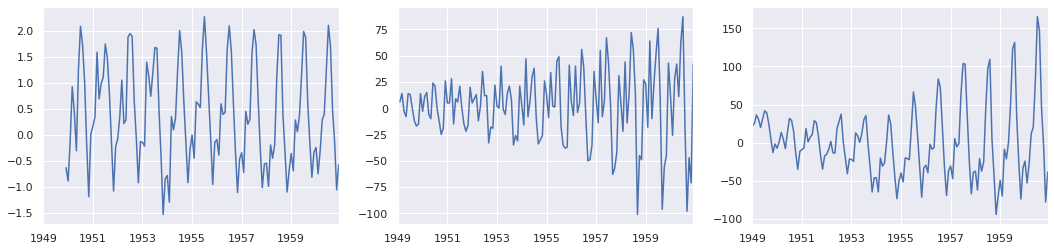

In [16]:
airpass[['de_trend_1']] = (airpass[['data']] -airpass[['data']].rolling(window=12).mean()) / airpass[['data']].rolling(window=12).std()
airpass[['de_trend_2']] = airpass[['data']].diff(1)
airpass[['de_trend_3']] =sm.tsa.tsatools.detrend(airpass[['data']],
order=1)
plt.figure(figsize = (18,4))
plt.subplot(131)
airpass.de_trend_1.plot();
plt.subplot(132)
airpass.de_trend_2.plot();
plt.subplot(133)
airpass.de_trend_3.plot();

In [19]:
airpass[['de_trend_1']]

,de_trend_1
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,1.705917
1960-09-01,0.483550
1960-10-01,-0.128218
1960-11-01,-1.055524


Обратите внимание, что для того, чтобы сделать данные стационарными, мы также
можем удалить сезонную часть. Самый простой способ - сделать сезонную производную
для рядов с исключенным трендом.

In [20]:
airpass


,data,de_trend_1,de_trend_2,de_trend_3
1949-01-01,112,NaN,NaN,21.690038
1949-02-01,118,NaN,6.0,25.032854
1949-03-01,132,NaN,14.0,36.375670
1949-04-01,129,NaN,-3.0,30.718487
1949-05-01,121,NaN,-8.0,20.061303
...,...,...,...,...
1960-08-01,606,1.705917,-16.0,146.341475
1960-09-01,508,0.483550,-98.0,45.684291
1960-10-01,461,-0.128218,-47.0,-3.972893
1960-11-01,390,-1.055524,-71.0,-77.630077


In [21]:
airpass.de_trend_1.diff(12)

1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01   -0.162722
1960-09-01   -0.113694
1960-10-01    0.014017
1960-11-01   -0.241192
1960-12-01   -0.234010
Freq: MS, Name: de_trend_1, Length: 144, dtype: float64

,data,de_trend_1,de_trend_2,de_trend_3,de_season
1949-01-01,112,NaN,NaN,21.690038,NaN
1949-02-01,118,NaN,6.0,25.032854,NaN
1949-03-01,132,NaN,14.0,36.375670,NaN


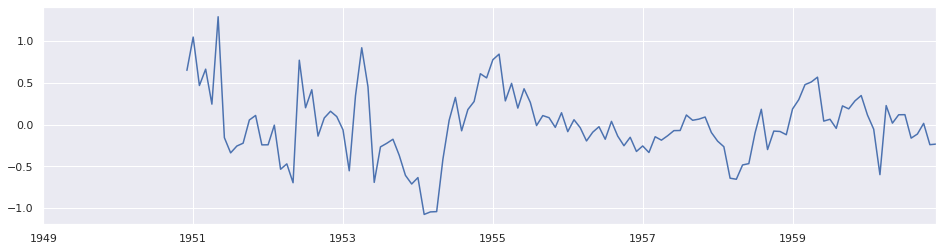

In [23]:
airpass['de_season'] = airpass.de_trend_1.diff(12)
airpass.de_season.plot();
airpass.head(3)

In [24]:
print('airpass.de_trend_1')
dftest = sm.tsa.stattools.adfuller(airpass.de_trend_1.dropna(),
autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
     print("\t{}: {} - The data is {} stationary with {}%confidence".
           format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

airpass.de_trend_1
Test statistic = -2.481
P-value = 0.120
Critical values :
	1%: -3.4865346059036564 - The data is not stationary with 99%confidence
	5%: -2.8861509858476264 - The data is not stationary with 95%confidence
	10%: -2.579896092790057 - The data is not stationary with 90%confidence


In [27]:
print('airpass.de_trend_2')
dftest = sm.tsa.stattools.adfuller(airpass.de_trend_2.dropna(),
autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
     print("\t{}: {} - The data is {} stationary with {}%confidence".
           format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

airpass.de_trend_2
Test statistic = -2.829
P-value = 0.054
Critical values :
	1%: -3.4816817173418295 - The data is not stationary with 99%confidence
	5%: -2.8840418343195267 - The data is not stationary with 95%confidence
	10%: -2.578770059171598 - The data is  stationary with 90%confidence


In [28]:
print('airpass.de_trend_3')
dftest = sm.tsa.stattools.adfuller(airpass.de_trend_3.dropna(),
autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
     print("\t{}: {} - The data is {} stationary with {}%confidence".
           format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

airpass.de_trend_3
Test statistic = -2.102
P-value = 0.244
Critical values :
	1%: -3.4816817173418295 - The data is not stationary with 99%confidence
	5%: -2.8840418343195267 - The data is not stationary with 95%confidence
	10%: -2.578770059171598 - The data is not stationary with 90%confidence


In [30]:
print('airpass.de_season')
dftest = sm.tsa.stattools.adfuller(airpass.de_season.dropna(),
autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
     print("\t{}: {} - The data is {} stationary with {}%confidence".
           format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

airpass.de_season
Test statistic = -3.181
P-value = 0.021
Critical values :
	1%: -3.4924012594942333 - The data is not stationary with 99%confidence
	5%: -2.8886968193364835 - The data is  stationary with 95%confidence
	10%: -2.5812552709190673 - The data is  stationary with 90%confidence


Существует множество методов декомпозиции временных рядов. Мы начнем со
statsmodels.tsa.seasonal_decompose,
чтобы
автоматически
реализует
одностороннюю
или
двухстороннюю
скользящим средним, а затем пытается найти такую составляющую, что = + ,
где – это временной ряд без тренда.

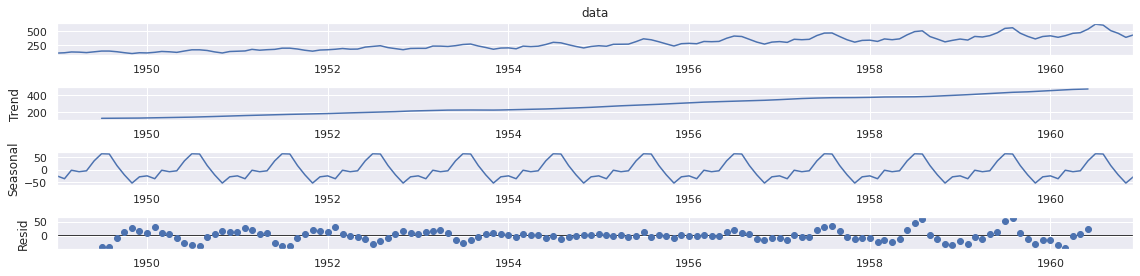

In [31]:
result = sm.tsa.seasonal_decompose(airpass.data, model='additive', period
= 12, two_sided = True)
result.plot()
plt.show()

Мы также можем построить результаты разложения вместе.

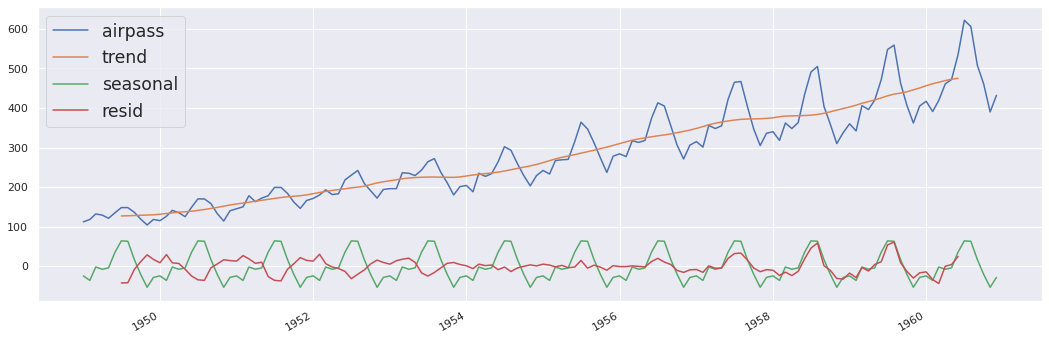

In [32]:
plt.figure(figsize=(18,6))
plt.plot(airpass.data, label="airpass")
result.trend.plot(label="trend")
result.seasonal.plot(label="seasonal")
result.resid.plot(label="resid")
plt.legend(fontsize ='x-large')
plt.show()

Давайте проанализируем остатки нашей декомпозиции

Test RMSE: 221.531
            resid
count  132.000000
mean    -0.751263
std     19.340535
min    -43.967172
25%    -11.248422
50%     -0.452020
75%      9.527146
max     61.051768


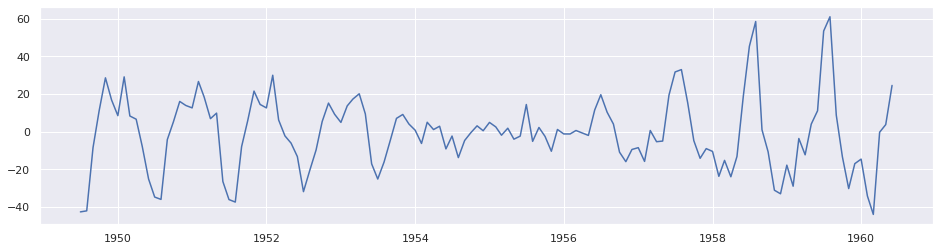

In [33]:
residuals =result.resid
rmse = np.sqrt(np.sum(np.power(residuals,2)))
print('Test RMSE: %.3f' % rmse)
residuals = pd.DataFrame(residuals)
print(residuals.describe())
plt.plot(residuals)
plt.show()

Предсказание временных рядов
Наивное предсказание
Мы можем сделать простой (наивный) одношаговый прогноз. Давайте превратим наш
набор данных в задачу обучения с учителем. Мы можем добиться этого, создав ряд с
задержкой. Теперь, в преобразованном наборе данных значения в (t) являются
предикторами (X), а значения в (t + 1) являются целевой переменной (Y).}

In [35]:
airpass['label'] = airpass.data.shift(1)
airpass.head()

,data,de_trend_1,de_trend_2,de_trend_3,de_season,label
1949-01-01,112,NaN,NaN,21.690038,NaN,NaN
1949-02-01,118,NaN,6.0,25.032854,NaN,112.0
1949-03-01,132,NaN,14.0,36.375670,NaN,118.0
1949-04-01,129,NaN,-3.0,30.718487,NaN,132.0
1949-05-01,121,NaN,-8.0,20.061303,NaN,129.0


Затем мы можем разделить набор данных на обучающую и тестовую подмножества, как
показано ниже: 70% серии - обучающие, а 30% - тестовые данные.

In [36]:
x = airpass.data.values
y = airpass.label.values
train_size = int(len(x) * 0.7)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [45]:
int(len(x)*0.7)

100

Наивное предсказание эквивалентно ( t+ 1) = ( t)




In [38]:
def naive_forecast(x_ts, n_predict):
   forecast = [x_ts[-1]]*n_predict
   return forecast
def forecast_residual(x_pred, x_ground_truth):
   residual = x_ground_truth-x_pred
   return residual

Мы можем оценить нашу базовую модель на тестовом наборе данных. Мы шаг за шагом
будем просматривать набор тестовых данных (второй столбец) и получать прогнозы.

In [48]:
x_train[-1]

348

In [49]:
x_test.size

44

Test RMSE: 327.744
                0
count   44.000000
mean    -1.909091
std     49.943139
min    -87.000000
25%    -42.250000
50%    -11.000000
75%     42.750000
max    101.000000


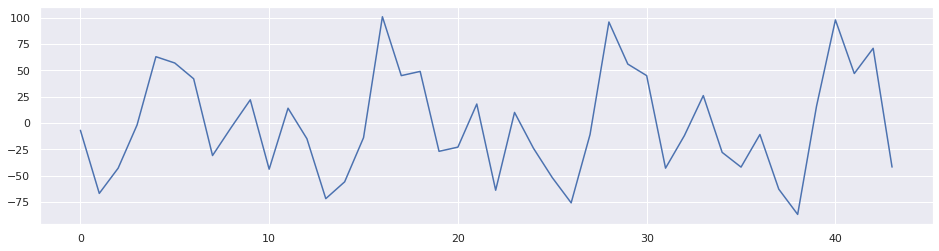

In [39]:
n_preidctions = x_test.size
predicted = naive_forecast(x_train,n_preidctions)
residuals = forecast_residual(x_test,y_test)
rmse = np.sqrt(np.sum(np.power(residuals,2)))

print('Test RMSE: %.3f' % rmse)
residuals = pd.DataFrame(residuals)
print(residuals.describe())
plt.plot(residuals)
plt.show()

Также будет полезно визуализировать данные.

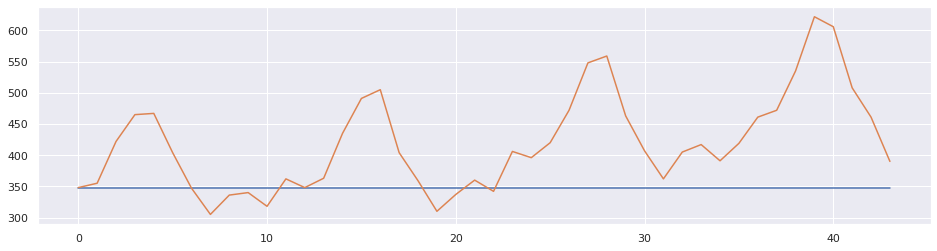

In [51]:
plt.plot(predicted)
plt.plot(y_test)

Как мы видим выше, остатки нашего прогноза достаточно отличаются от нормального
распределения. Также сводная статистика позволяет предположить смещение в модели.

Как мы видим выше, остатки нашего прогноза достаточно отличаются от нормального
распределения. Также сводная статистика позволяет предположить смещение в модели.
Помимо простого наивного прогноза, его можно сделать сезонно-наивным,

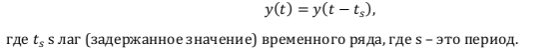

In [52]:
def snaive_forecast(x_ts, season_period, n_predict):
    forecast = np.zeros(n_predict)
    for i in range (min(n_predict,season_period)):
        forecast[i] = x_ts[-season_period+i]
    if n_predict>season_period:
        for i in range (n_predict-season_period):
            forecast[i+season_period] = forecast[i]
    return forecast

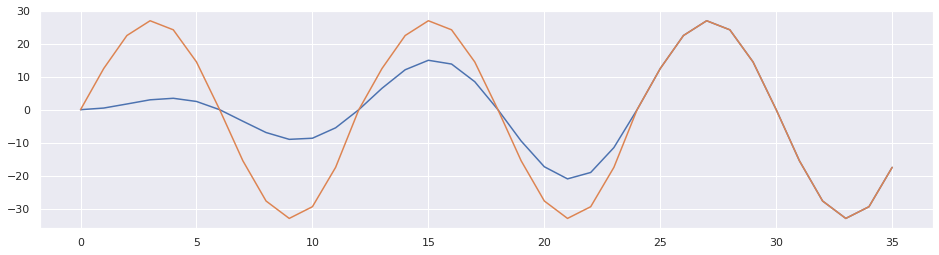

In [53]:
x =np.arange(36)* np.sin(2*np.pi*np.arange(36)/12)
plt.plot(x)
x_also = snaive_forecast(x, season_period=12, n_predict=36)
plt.plot(x_also)

Test RMSE: 692.528
                0
count   44.000000
mean    79.340909
std     68.643990
min    -38.000000
25%     28.000000
50%     73.500000
75%    117.500000
max    251.000000


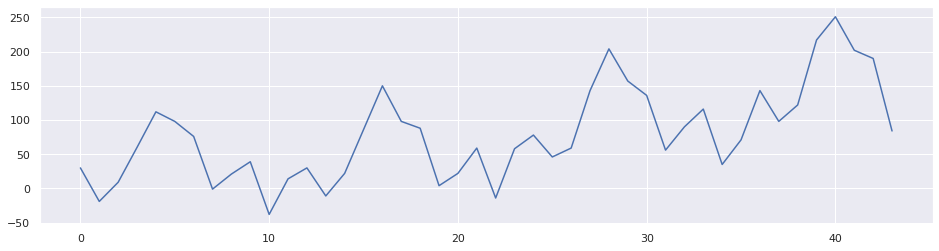

In [54]:
n_preidctions = x_test.size
season_period = 12
predicted = snaive_forecast(x_train,season_period,n_preidctions)
residuals = forecast_residual(predicted,y_test)
rmse = np.sqrt(np.sum(np.power(residuals,2)))
print('Test RMSE: %.3f' % rmse)
residuals = pd.DataFrame(residuals)
print(residuals.describe())
plt.plot(residuals)
plt.show()

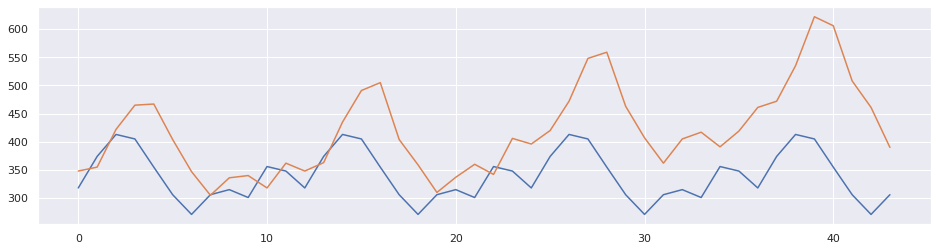

In [55]:
plt.plot(predicted)
plt.plot(y_test);

Как мы видим предсказание несколько лучше.

Сглаживающие предсказания
Помимо
простого
скользящего
среднего,
может
выполняться
экспоненциальное
сглаживание.

In [56]:
from statsmodels.tsa.holtwinters import (SimpleExpSmoothing, # SEMA
Holt,# DEMA
ExponentialSmoothing) # TEMA

Single Exponential Smoothing (экспоненциальное скользящее среднее, SEMA):

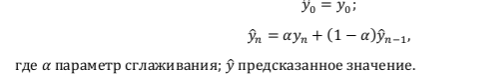

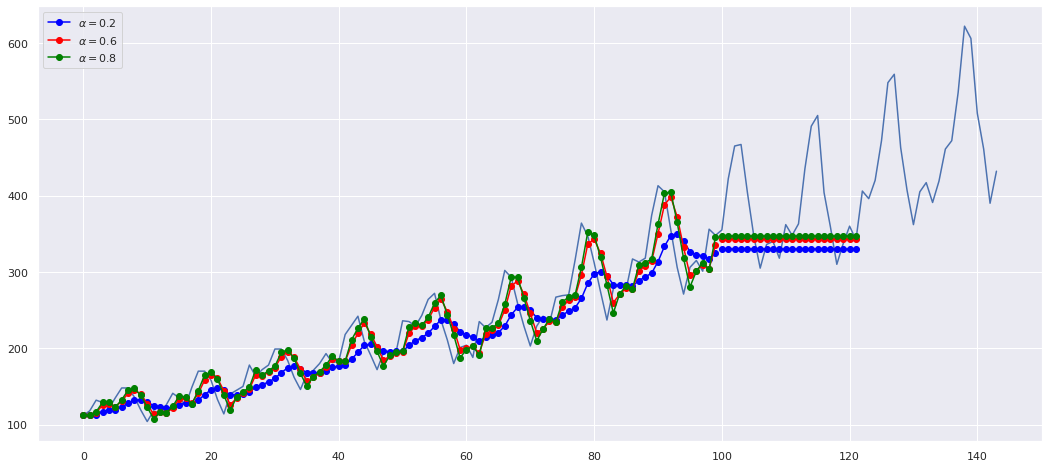

In [58]:
n_predict = x_test.size//2
x_train = pd.DataFrame(x_train)
plt.figure(figsize=(18,8))
plt.plot(airpass.data.values, label='groud')
# Simple Exponential Smoothing
fit1 =SimpleExpSmoothing(x_train).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(n_predict).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', color='blue')
fit2 =SimpleExpSmoothing(x_train).fit(smoothing_level=0.6,optimized=False)

fcast2 = fit2.forecast(n_predict).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')
fit3 =SimpleExpSmoothing(x_train).fit(smoothing_level=0.8,optimized=False)
fcast3 =fit3.forecast(n_predict).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')
plt.show()

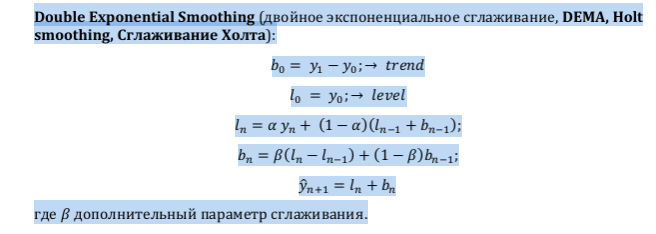

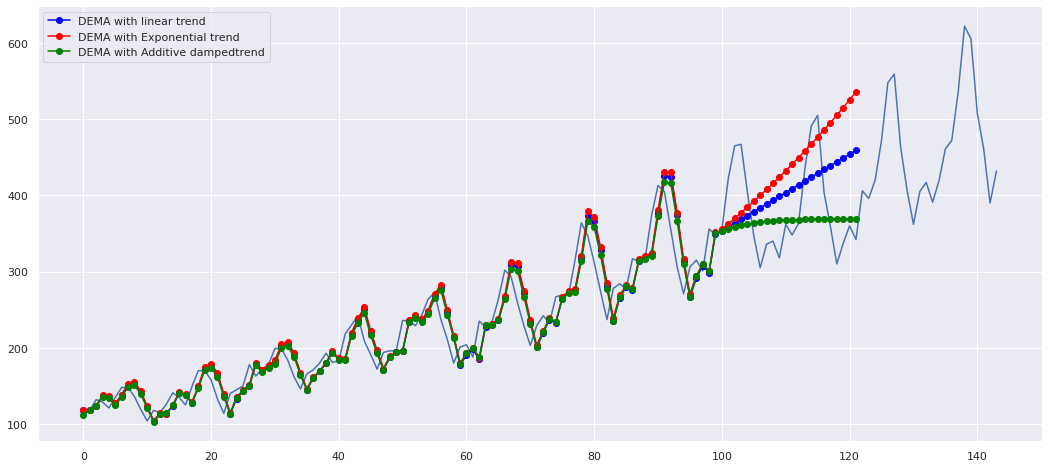

In [60]:
n_predict = x_test.size//2
x_train = pd.DataFrame(x_train)
plt.figure(figsize=(18,8))

plt.plot(airpass.data.values, label='groud')
fit1 = Holt(x_train).fit(smoothing_level=0.8, smoothing_trend=0.2,
optimized=False)
fcast1 = fit1.forecast(n_predict).rename("DEMA with linear trend")
fit2 = Holt(x_train, exponential=True).fit(smoothing_level=0.8,
smoothing_trend=0.2, optimized=False)
fcast2 = fit2.forecast(n_predict).rename("DEMA with Exponential trend")
fit3 = Holt(x_train, damped_trend=True).fit(smoothing_level=0.8,
smoothing_trend=0.2)
fcast3 = fit3.forecast(n_predict).rename("DEMA with Additive dampedtrend")
fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(marker="o", color='red')
fcast2.plot(color='red', marker="o", legend=True)
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='green', marker="o", legend=True)
plt.show()

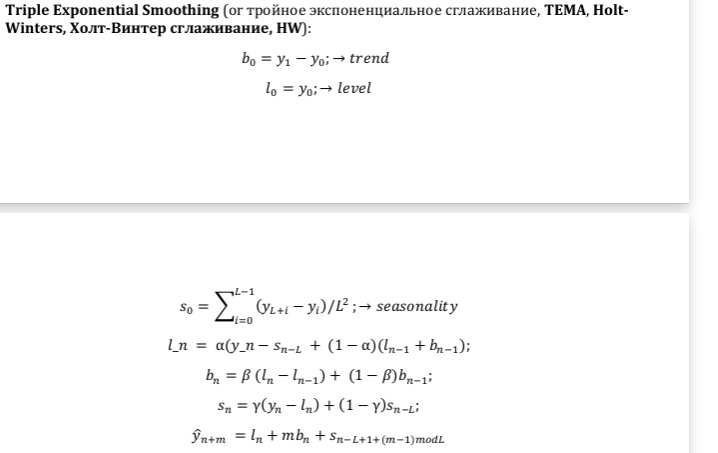

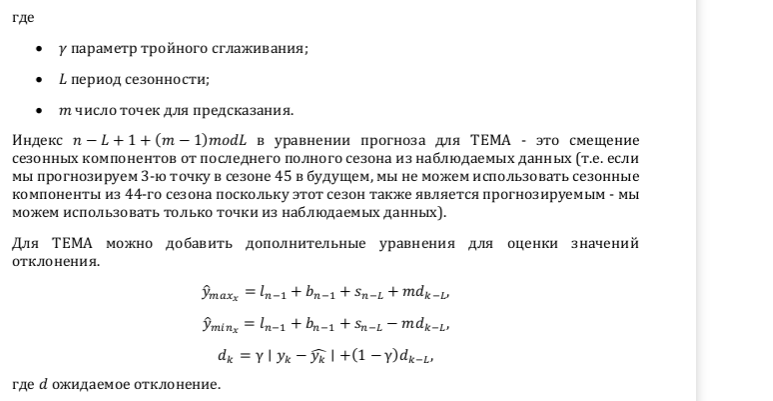

In [66]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

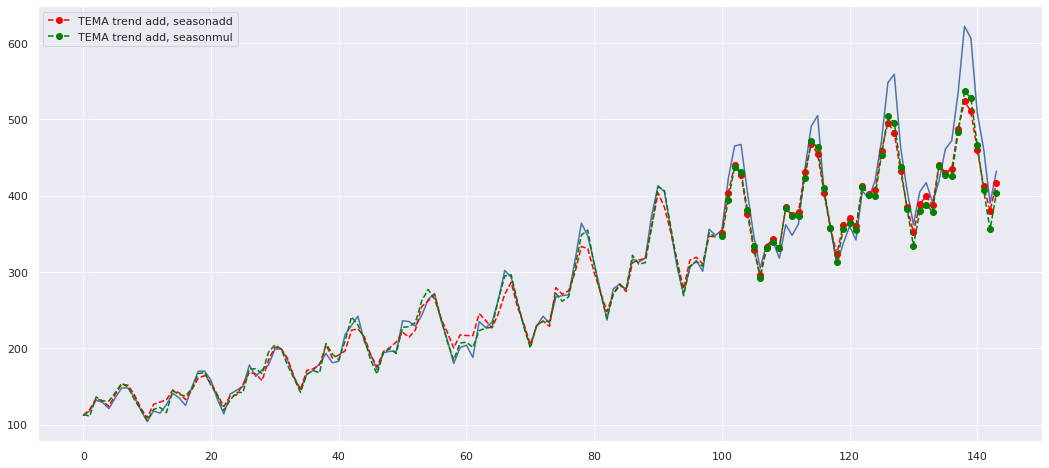

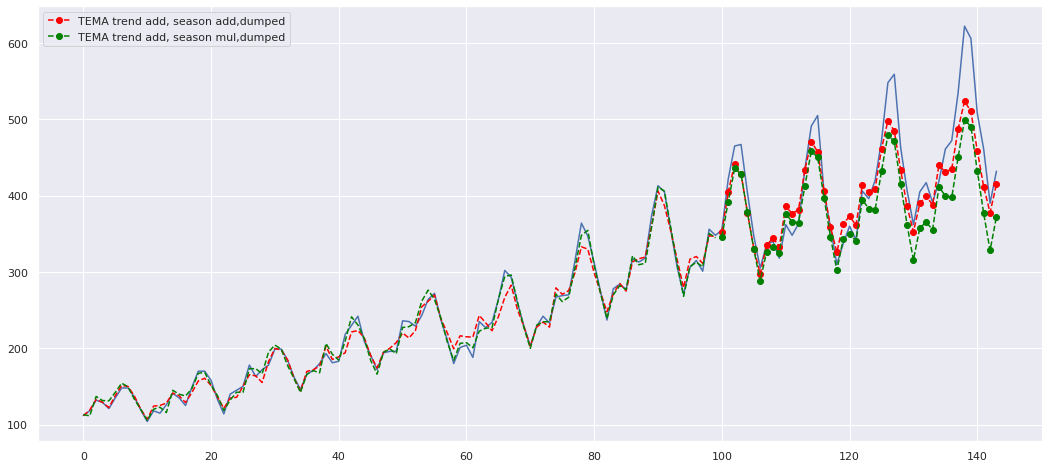

In [70]:
n_predict = x_test.size
x_train = pd.DataFrame(x_train)
fit1 = ExponentialSmoothing(x_train, seasonal_periods=12, trend='add',
                            seasonal='add').fit()
fit2 = ExponentialSmoothing(x_train, seasonal_periods=12, trend='add',
                            seasonal='mul').fit()
fit3 = ExponentialSmoothing(x_train, seasonal_periods=12, trend='add',
                            seasonal='add', damped_trend=True).fit()
fit4 = ExponentialSmoothing(x_train, seasonal_periods=12, trend='add',
                            seasonal='mul', damped_trend=True).fit()
plt.figure(figsize=(18,8))
plt.plot(airpass.data.values, label='groud')
fit1.fittedvalues.plot(style='--', color='red' )
fit2.fittedvalues.plot(style='--', color='green', label='trend add, seasonmul')
fit1.forecast(n_predict).rename("TEMA trend add, seasonadd").plot(style='--', marker='o', color='red', legend=True)
fit2.forecast(n_predict).rename("TEMA trend add, seasonmul").plot(style='--', marker='o', color='green', legend=True)
plt.show()
plt.figure(figsize=(18,8))
plt.plot(airpass.data.values, label='groud')
fit3.fittedvalues.plot(style='--', color='red')
fit4.fittedvalues.plot(style='--', color='green')
fit3.forecast(n_predict).rename("TEMA trend add, season add,dumped").plot(style='--', marker='o', color='red', legend=True)
fit4.forecast(n_predict).rename("TEMA trend add, season mul,dumped").plot(style='--', marker='o', color='green', legend=True)
plt.show()